In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart-disease-dataset.csv')

In [3]:
data.head(5)

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [7]:
max(data['oldpeak']), max(data['exercise_angina']), max(data['fasting_blood_sugar']), max(data['resting_ecg'])

(6.2, 1.0, 1.0, 2.0)

In [10]:
#No Null values present in any column so its good to go
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

In [11]:
data.shape

(1190, 12)

<Axes: ylabel='count'>

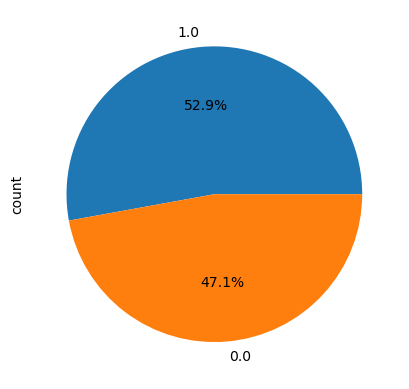

In [23]:
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [27]:
data['target'] = data['target'].replace({'0.0':'0','1.0': '1'})

In [28]:
data.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [31]:
x = data.drop('target',axis = 1)
y = data[['target']]

In [32]:
x

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1185,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0
1186,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0
1187,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0
1188,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0


In [33]:
y

,target
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
1185,1.0
1186,1.0
1187,1.0
1188,1.0


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

In [37]:
len(x_train), len(x_test), len(y_train), len(y_test)

(952, 238, 952, 238)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [40]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

In [44]:
#Finding the best cost complexity pruning values to insert in ccp_alpha to helps control overfitting 
path = DecisionTreeClassifier().cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas  # gives you a list of ccp_alpha values to try

In [45]:
ccp_alphas

array([0.        , 0.00069485, 0.00078782, 0.00087535, 0.00095038,
       0.00096289, 0.00096962, 0.00097539, 0.00098116, 0.00098477,
       0.00098477, 0.00098863, 0.00099206, 0.00100665, 0.00102124,
       0.00119819, 0.00125545, 0.00128385, 0.00138648, 0.00157563,
       0.00157563, 0.00164157, 0.00168067, 0.00168067, 0.00168067,
       0.0017507 , 0.0017507 , 0.00175654, 0.00177527, 0.00177763,
       0.00180072, 0.00181339, 0.00186741, 0.00186741, 0.00191599,
       0.00195078, 0.00224293, 0.00236756, 0.00245297, 0.00247347,
       0.0025783 , 0.0026072 , 0.00262605, 0.00263792, 0.00267857,
       0.0027277 , 0.00282707, 0.00295868, 0.00320705, 0.00326797,
       0.00330279, 0.00360144, 0.00390127, 0.00391739, 0.00417644,
       0.00469928, 0.0049078 , 0.00497219, 0.00505623, 0.00513121,
       0.00580291, 0.00621886, 0.00725403, 0.01001902, 0.01222857,
       0.02614482, 0.03019081, 0.16226293])

In [46]:
model = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5)

In [47]:
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best']})

In [48]:
best_model = model.best_estimator_

In [49]:
best_model

DecisionTreeClassifier(max_depth=10)

In [51]:
y_pred = best_model.predict(x_test)

In [52]:
y_pred

array([1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1.

In [53]:
best_model.score(x_test,y_test)

0.8949579831932774

In [54]:
best_model.score(x_train, y_train)

0.9884453781512605

In [58]:
print(best_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89       107
         1.0       0.95      0.85      0.90       131

    accuracy                           0.89       238
   macro avg       0.90      0.90      0.89       238
weighted avg       0.90      0.89      0.90       238



In [60]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[101   6]
 [ 19 112]]


In [69]:
(112 + 101) / (112 + 6 + 101 + 19)

0.8949579831932774

In [66]:
m = confusion_matrix(y_test, y_pred)
TP = conf_matrix[1,1]
TN = conf_matrix[0,0]
FP = conf_matrix[0,1]
FN = conf_matrix[1,0]

TP, TN

acc2 = (TP + TN) / (TP + TN + FP + FN)
print("Manual Accuracy:", acc2)

Manual Accuracy: 0.8949579831932774


In [67]:
TP, TN

(112, 101)